# Récuperation des données 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
                    # Télécharger les données
data = yf.download("AAPL", start="2010-01-01", end="2025-12-31")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


### Sauvegarde 

In [3]:
data.to_csv('MyDatabase.csv')

### Chargement de la base après traitement sur excel

In [4]:
data = pd.read_csv("MyDatabase.csv")

### Calcul des rendements journaliers

In [6]:
            #les rendements en % si vous avez modifié les prix
data['Rendements'] = np.log(data['Close'] / data['Close'].shift(1))

data['Dates']=pd.to_datetime(data['Dates'],format='%Y-%m-%d')

            # Sélectionner les colonnes voulues
#data = data[['Dates','Close', 'Low', 'Open', 'Volume', 'Rendements']].dropna()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

### Exportation

In [20]:
#data.to_csv('Database Apple Inc_2010-2025.csv')

# Analyse exploratoire

### Évolution des prix des actions d'Apple

In [ ]:
import matplotlib.pyplot as plt

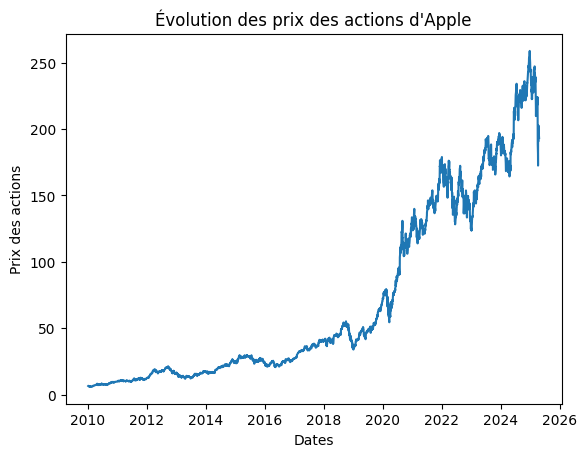

In [21]:
# Évolution du prix des actions
plt.figure()
plt.plot(data['Dates'], data['Close'])
plt.xlabel("Dates")
plt.ylabel("Prix des actions")
plt.title("Évolution des prix des actions d'Apple")
plt.show()


**Interpretation:**  
Entre 2010 et 2025, la valeur de l’action a connu une forte hausse, surtout après 2019, portée par la demande technologique. À partir de 2021, la volatilité augmente, et une baisse apparaît en 2025, reflétant possiblement un retournement de tendance ou un choc économique.

### Graphique des rendements

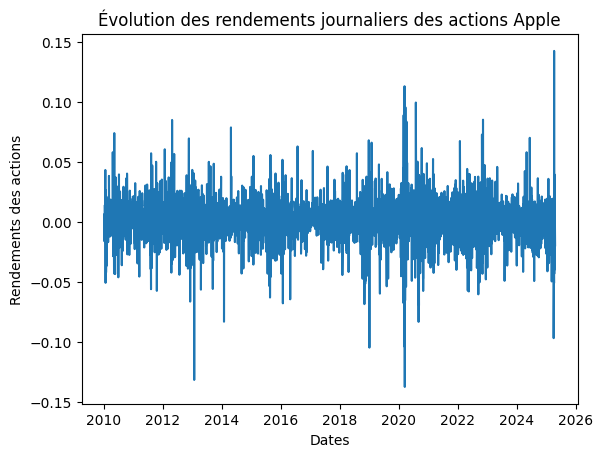

In [22]:
# Évolution du prix des actions
plt.figure()
plt.plot(data['Dates'], data['Rendements'])
plt.xlabel("Dates")
plt.ylabel("Rendements des actions")
plt.title("Évolution des rendements journaliers des actions Apple")
plt.show()


**Interpretation:**  
Le graphique illustre les fluctuations quotidiennes des rendements des actions Apple entre 2010 et 2025. On observe que, la plupart du temps, les rendements restent concentrés autour de zéro, ce qui est typique pour ce type de série financière. Cependant, certaines périodes, notamment autour de 2020, se distinguent par une forte volatilité, avec des hausses et baisses plus marquées. Ces épisodes de turbulences peuvent correspondre à des événements économiques ou financiers majeurs. Ce comportement, où les périodes calmes alternent avec des phases agitées, confirme la présence d’une hétéroscédasticité conditionnelle, ce qui pourrait justifier l'utilisation d’un modèle ARCH pour analyser et prévoir la volatilité.

### Statistique descriptive

In [23]:
mean_rend = data['Rendements'].mean()
sd_rend = data['Rendements'].std()
coeff_variation = sd_rend / mean_rend

print(f"Le rendement moyen des actions d'Apple est : {mean_rend}")
print(f"L'écart-type des rendements des actions d'Apple est : {sd_rend}")
print(f"Le coefficient de variation vaut : {coeff_variation}")


Le rendement moyen des actions d'Apple est : 0.0008840495966564589
L'écart-type des rendements des actions d'Apple est : 0.017877199429839914
Le coefficient de variation vaut : 20.221941729799784


**Interprétation:**  
L'analyse révèle des rendements journaliers moyens quasi-nuls (0,08%) mais une volatilité marquée (écart-type de 1,78%), caractéristique des actifs technologiques. Le coefficient de variation élevé (20.22) souligne un déséquilibre risque-rendement typique, où les fluctuations quotidiennes l'emportent sur l'espérance de gain à court terme. Ces dynamiques, influencées par les chocs sectoriels et macroéconomiques, justifient l'usage de modèles de volatilité (ARCH/GARCH) et confirment la nécessité d'un horizon d'investissement pluriannuel pour capter la performance historique d'Apple tout en amortissant ses variations journalières prononcées. Cette combinaison de volatilité et de croissance à long terme reflète le profil des valeurs tech majeures.

# Vérification d'adéquation avec le modèle ARCH

## Stationnarité

**Hypothèses du test ADF :**  
  - $H_0$ : la série possède une racine unitaire → **non stationnaire**.
  - $H_1$ : la série est stationnaire.

In [47]:
# Importation des bibliothèques
from statsmodels.tsa.stattools import adfuller

# Supposons que les rendements soient dans la colonne 'Rendements' d'un DataFrame nommé data
serie = data['Rendements'].dropna()

# Test de Dickey-Fuller
adf_result = adfuller(serie)

# Affichage des résultats
print("Résultat du test de Dickey-Fuller augmenté :")
print(f"Statistique ADF : {adf_result[0]:.4f}")
print(f"p-value : {adf_result[1]:.4f}")
print("Valeurs critiques :")
for key, value in adf_result[4].items():
    print(f"   {key} : {value:.4f}")


Résultat du test de Dickey-Fuller augmenté :
Statistique ADF : -20.6427
p-value : 0.0000
Valeurs critiques :
   1% : -3.4321
   5% : -2.8623
   10% : -2.5672



**Interprétation :**

La statistique ADF est largement inférieure à la valeur critique de -2.8623, et la p-value est très proche de zéro.  Donc on rejette l’hypothèse nulle de non-stationnarité au seuil de 5 %.  
Par conséquent, la série des **rendements est stationnaire**, ce qui est conforme aux attentes pour ce type de données financières.

## Test de normalité de Jarque Bera

**Hypothèses:**  
**$H₀ (hypothèse nulle)$ :**
Les résidus suivent une distribution normale (symétrique, en cloche, sans aplatissement excessif).

**$H₁ (hypothèse alternative) $:**
Les résidus ne suivent pas une distribution normale (il y a une asymétrie ou un aplatissement anormal)

In [46]:
from scipy.stats import jarque_bera

# Test de Jarque-Bera sur les rendements
jb_stat, jb_pvalue = jarque_bera(data['Rendements'])

print(f"Statistique de Jarque-Bera : {jb_stat:.4f}")
print(f"p-valeur : {jb_pvalue:.4f}")


Statistique de Jarque-Bera : 6090.5515
p-valeur : 0.0000


**Interprétation:**  
La p-valeur étant très inférieure au seuil de 5%, nous rejetons l’hypothèse nulle de normalité. Cela signifie que les rendements ne suivent pas une distribution normale.

## Illustration Graphique

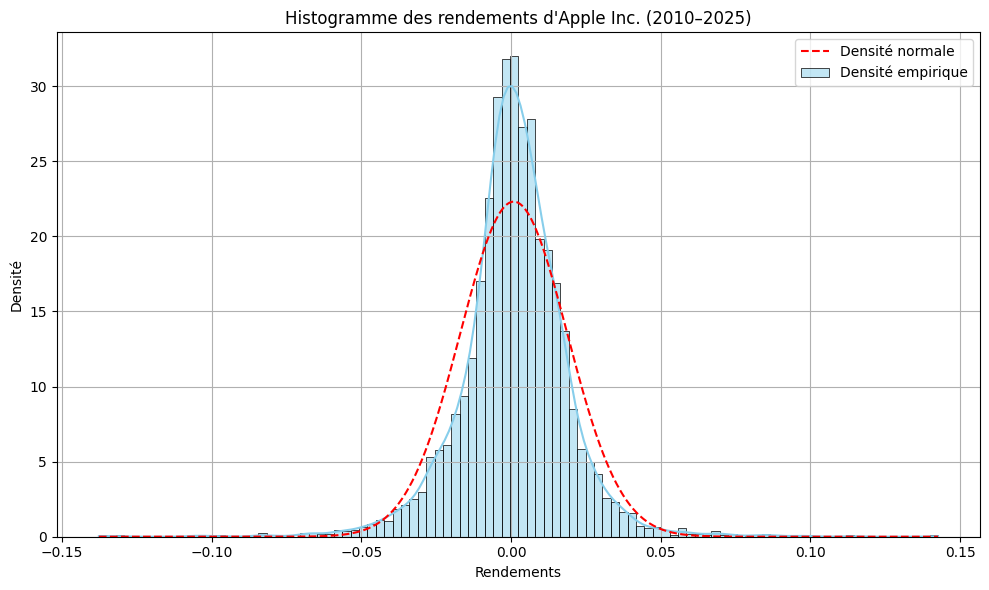

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Tracé de l'histogramme avec la densité empirique
plt.figure(figsize=(10, 6))
sns.histplot(data['Rendements'], bins=100, kde=True, stat='density', color='skyblue', label='Densité empirique')

# Superposition de la densité normale théorique
mu, sigma = data['Rendements'].mean(), data['Rendements'].std()
x = np.linspace(data['Rendements'].min(), data['Rendements'].max(), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Densité normale')

# Titres et légendes
plt.title("Histogramme des rendements d'Apple Inc. (2010–2025)")
plt.xlabel("Rendements")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Interprétation:**  
La distribution des rendements journaliers d’Apple Inc. n’est pas parfaitement normale, bien qu’elle s’en rapproche visuellement.  
Cette observation suggère la présence de queues épaisses, caractéristiques fréquentes des séries financières.  
En d’autres termes, les extrêmes (hausses ou baisses soudaines) sont plus fréquents que ce que prédirait une loi normale classique.  
Ce comportement est typique des marchés financiers et traduit une volatilité accrue.  
Cette constatation visuelle est d’ailleurs en accord avec les résultats du test de normalité de Jarque-Bera, qui rejette l’hypothèse de normalité des rendements.


## Autocorrélation des carrés des rendements

<Figure size 2000x1000 with 0 Axes>

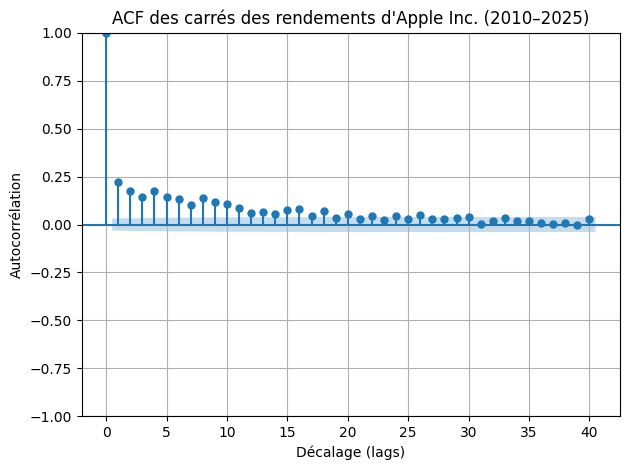

In [62]:
from statsmodels.graphics.tsaplots import plot_acf

# Tracé de l'ACF des carrés des rendements
plt.figure(figsize=(20, 10))
plot_acf(data['Rendements']**2, lags=40, alpha=0.05)
plt.title("ACF des carrés des rendements d'Apple Inc. (2010–2025)")
plt.xlabel("Décalage (lags)")
plt.ylabel("Autocorrélation")
plt.grid(True)
plt.tight_layout()
plt.show()


**Interprétation:**  
Les autocorrélations significatives des carrés des rendements indiquent une volatilité clusterisée (périodes calmes suivies de périodes turbulentes).
La décroissance lente suggère que les chocs de volatilité persistent longtemps.
Les autocorrélations négatives à certains lags pourraient refléter un effet de levier (les mauvaises nouvelles augmentent plus la volatilité que les bonnes). 

## Test d'ARCH de Engle

**Hypothèses:**  
**$H_0 (hypothèse nulle)$:** pas d'effet ARCH (pas d'hétéroscédasticité conditionnelle)  
**$H_1 (alternative)$:** présence d’effet ARCH

In [30]:
from statsmodels.stats.diagnostic import het_arch

# Test d'ARCH sur les rendements
arch_test = het_arch(data['Rendements'], nlags=12)

# Résultats
print(f"Statistique du test d'ARCH : {arch_test[0]:.5f}")
print(f"p-valeur : {arch_test[1]:.5f}")


Statistique du test d'ARCH : 392.15775
p-valeur : 0.00000


**Décision:**  
On a p-valeur < 0.05, on rejette H0.
Par conséquent, la série suit un modèle ARCH

# Estimation des paramètres du modèles

## Choix du paramètre p

A l'issu du test, nous devons choisir la valeur de p pour laquelle l'AIC(Akaike Information Criterion)ou le BIC(Bayesian Information Criterion), est le plus faible.  
$NB$: Les rendements sont à l'echelle 100.

In [31]:
from arch import arch_model
# Recaler les rendements
rendement_scaled = 100 * data['Rendements']  # en pourcentages
for p in range(1, 21):
    model = arch_model(rendement_scaled, vol='ARCH', p=p)
    result = model.fit(disp='off')
    print(f"ARCH({p}) - AIC: {result.aic:.4f}, BIC: {result.bic:.4f}")

ARCH(1) - AIC: 15125.3026, BIC: 15144.0677
ARCH(2) - AIC: 15025.3395, BIC: 15050.3597
ARCH(3) - AIC: 14958.1305, BIC: 14989.4058
ARCH(4) - AIC: 14929.4638, BIC: 14966.9941
ARCH(5) - AIC: 14851.8886, BIC: 14895.6739
ARCH(6) - AIC: 14829.8542, BIC: 14879.8946
ARCH(7) - AIC: 14816.3323, BIC: 14872.6277
ARCH(8) - AIC: 14791.5400, BIC: 14854.0904
ARCH(9) - AIC: 14793.1406, BIC: 14861.9462
ARCH(10) - AIC: 14795.0797, BIC: 14870.1403
ARCH(11) - AIC: 14788.3547, BIC: 14869.6703
ARCH(12) - AIC: 14790.2619, BIC: 14877.8326
ARCH(13) - AIC: 14791.3046, BIC: 14885.1304
ARCH(14) - AIC: 14793.3046, BIC: 14893.3854
ARCH(15) - AIC: 14789.8529, BIC: 14896.1888
ARCH(16) - AIC: 14784.5780, BIC: 14897.1689
ARCH(17) - AIC: 14785.4849, BIC: 14904.3308
ARCH(18) - AIC: 14761.9160, BIC: 14887.0170
ARCH(19) - AIC: 14763.9160, BIC: 14895.2721
ARCH(20) - AIC: 14765.1837, BIC: 14902.7948


**Résultat et choix de p:**  
Le modèle ARCH(8) représente un bon compromis, avec des résultats satisfaisants en termes de qualité et une structure relativement simple. Il permet de bien décrire la variabilité des données tout en évitant d’utiliser trop de paramètres inutiles, ce qui limite les risques d’ajustement excessif. Toutefois, si le but principal est d’obtenir les meilleurs résultats possibles, même si le modèle devient plus complexe et plus difficile à interpréter, le modèle ARCH(18) reste le plus performant selon les critères utilisés. Pour la suite nous allons choisir p=8

## Estimation du modèle ARCH(8)

### Estimation par Maximum de Vraisemblance (EMV)

NB: Les rendements sont à l'echelle 100

In [37]:
from arch import arch_model
# Estimation du modèle ARCH(8)
model = arch_model(100*data['Rendements'], vol='ARCH', p=8)
result = model.fit(disp='off')

# Afficher les coefficients
print(result.summary())


                      Constant Mean - ARCH Model Results                      
Dep. Variable:             Rendements   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7385.77
Distribution:                  Normal   AIC:                           14791.5
Method:            Maximum Likelihood   BIC:                           14854.1
                                        No. Observations:                 3847
Date:                Tue, Apr 22 2025   Df Residuals:                     3846
Time:                        12:31:03   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1591  2.830e-02      5.624  1.870e-08 [  0.104,  0.21

**Interprétation :**  
Le modèle ARCH(8) appliqué aux rendements indique que la moyenne des rendements est positivement estimée à environ 0,159 et statistiquement significative, ce qui suggère une légère tendance haussière.
Le modèle met en évidence une dépendance de la volatilité actuelle aux fluctuations passées. Plusieurs coefficients associés aux périodes précédentes, notamment $\alpha_1$, $\alpha_2$, $\alpha_3$, $\alpha_5$ et $\alpha_8$, sont significatifs, ce qui signifie que les variations passées ont un impact direct sur l’instabilité actuelle des rendements.
En revanche, certains coefficients, comme $\alpha_6$ et $\alpha_7$, ne sont pas significatifs, ce qui suggère qu’ils n’apportent pas d'information supplémentaire utile.
Dans l’ensemble, ce modèle représente efficacement l’évolution de la volatilité dans le temps, tout en conservant une structure relativement simple.


## Équation du modèle 

In [39]:
from IPython.display import Math

params = result.params  # Résultats du modèle

# Première équation
eq1 = r"Y_t = \epsilon_t \cdot \sigma_t"

# Deuxième équation construite proprement en brut
eq2_terms = [fr"{params['omega']:.5f}"]
for i in range(1, 9):
    key = f'alpha[{i}]'
    coef = f"{params[key]:.5f}"
    term = fr"{coef} \cdot \epsilon^2_{{t-{i}}}"
    eq2_terms.append(term)

eq2 = r"\sigma^2_t = " + " + ".join(eq2_terms)

# Équation finale avec "avec"
latex_full = fr"{eq1} \quad \text{{avec}} \quad {eq2}"

# Affichage
display(Math(latex_full))


<IPython.core.display.Math object>

  **Interpretation:**  
Le modèle ARCH(8) estimé se compose de deux équations. La première exprime le rendement comme le produit d’un choc aléatoire et d’une volatilité variable dans le temps. La seconde décrit cette volatilité conditionnelle $\sigma_t^2$ comme une combinaison d’une constante et des carrés des chocs passés jusqu’à huit périodes. Concrètement, la variance instantanée dépend des événements récents, avec des coefficients qui diminuent progressivement, reflétant une mémoire courte des effets passés. Le coefficient constant ($\alpha_0= 1.2173$) indique la base de la variance, tandis que les coefficients $\alpha_i$ traduisent l’influence des chocs antérieurs. L’ensemble du modèle montre que les rendements sont sensibles aux perturbations récentes, ce qui permet de mieux comprendre et anticiper les variations de volatilité dans le temps.


## Graphique de la volatilité

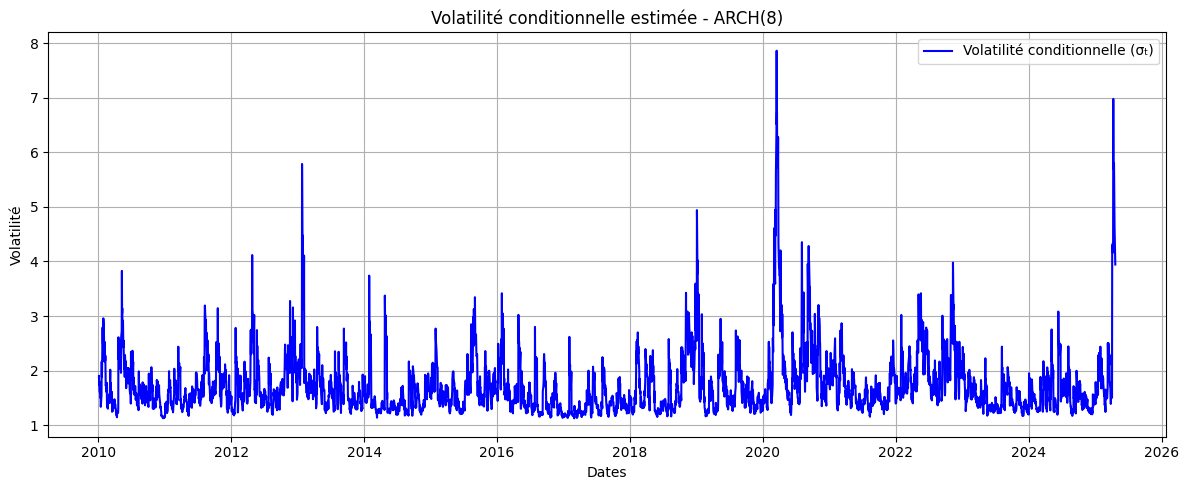

In [40]:
import matplotlib.pyplot as plt

# Afficher la volatilité conditionnelle (écart-type)
plt.figure(figsize=(12, 5))
plt.plot(data['Dates'], result.conditional_volatility, color='blue', label='Volatilité conditionnelle (σₜ)')
plt.title('Volatilité conditionnelle estimée - ARCH(8)')
plt.xlabel('Dates')
plt.ylabel('Volatilité')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interprétation:**  
On observe une volatilité très variable au cours du temps, avec des pics marqués notamment autour des années 2020(crise COVID-19) et 2025, ce qui suggère des périodes de forte incertitude sur les marchés financiers.
Le modèle ARCH(8) capte bien ces fluctuations rapides, traduisant l’impact direct des rendements passés sur la volatilité actuelle. La volatilité reste relativement modérée pendant les périodes calmes, mais augmente brutalement lors de chocs économiques ou de perturbations majeures.
Cette dynamique valide l’intérêt du modèle ARCH dans la modélisation de la **volatilité hétéroscédastique**, typique des séries financières.

# Diagnostic du modèle ARCH(8)

## Test de diagnostic résiduel

**Hypothèses:**  
**Hypothèse nulle (H₀) :**  
Il n’y a pas d’autocorrélation dans les carrés des résidus jusqu’au lag ℎ  
**Hypothèse alternative (H₁) :**    
Il existe une autocorrélation dans les carrés des résidus.

In [41]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import pandas as pd

# Résidus standardisés du modèle ARCH(8)
resid = result.std_resid

# Test de Ljung-Box sur les carrés des résidus pour différents retards
ljung_box = acorr_ljungbox(resid**2, lags=20, return_df=True)

# Affichage des p-values
print("Test de Ljung-Box sur les carrés des résidus :")
print(ljung_box[['lb_stat', 'lb_pvalue']])


Test de Ljung-Box sur les carrés des résidus :
      lb_stat  lb_pvalue
1    0.716154   0.397408
2    0.850188   0.653708
3    1.711320   0.634420
4    1.994214   0.736823
5    3.385864   0.640724
6    3.888948   0.691702
7    4.510730   0.719425
8    5.432108   0.710550
9    5.497950   0.788922
10   5.648284   0.843897
11   6.303174   0.852389
12   6.447118   0.891889
13   7.277996   0.887262
14   7.704973   0.904123
15   7.760486   0.933026
16   8.896233   0.917625
17   8.896816   0.943443
18  14.930772   0.666715
19  15.476331   0.691880
20  15.612331   0.740365


**Interprétation:**  
Les p-values associées à chaque lag sont toutes largement supérieures à 0.05. Cela signifie que l’on ne détecte pas d’autocorrélation significative dans les carrés des résidus jusqu’au 20ᵉ retard.
Le test de Ljung-Box ne rejette pas l’hypothèse nulle, ce qui indique que le modèle ARCH(8) semble suffisant pour expliquer la dynamique de la volatilité.
Autrement dit, il ne reste pas de schéma particulier dans la variance des résidus : le modèle capture bien les fluctuations passées.

## Visualisation

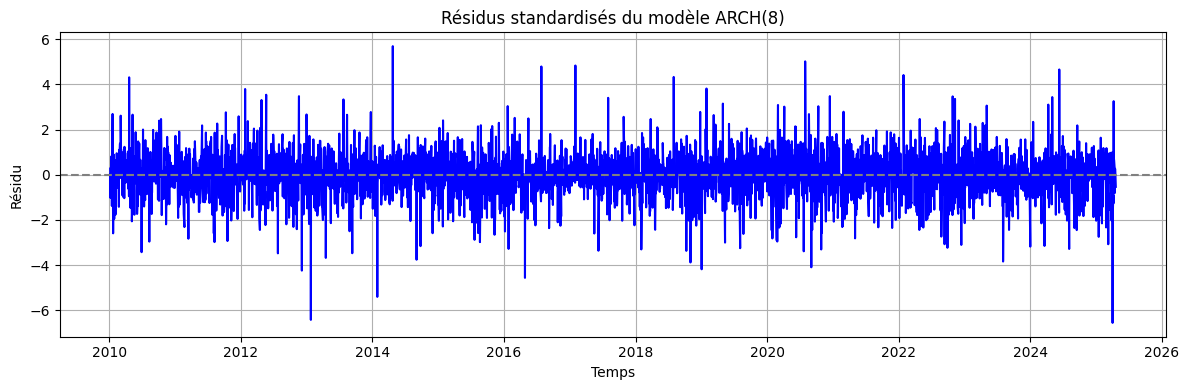

In [49]:
plt.figure(figsize=(12, 4))
plt.plot(data['Dates'],resid,color='blue')
plt.title("Résidus standardisés du modèle ARCH(8)")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Temps")
plt.ylabel("Résidu")
plt.grid(True)
plt.tight_layout()
plt.show()


**Interprétation:**  
- On observe que les résidus sont globalement centrés autour de zéro, ce qui est un bon signe de spécification correcte du modèle.
- Cependant, quelques pics importants subsistent, traduisant des événements extrêmes ponctuels que le modèle ne capture pas parfaitement.
- La dispersion semble relativement constante dans le temps, ce qui confirme que le modèle a bien capturé l’hétéroscédasticité (variabilité non constante) présente initialement dans la série.

# Interprétation économique du modèle ARCH(8)

Le modèle ARCH(8) appliqué aux rendements d’Apple Inc. indique que la volatilité varie dans le temps et dépend des chocs récents. Lorsqu’un événement entraîne de fortes variations de prix, son effet se prolonge sur plusieurs jours, ce qui reflète une mémoire de court terme typique des marchés financiers. Les coefficients estimés montrent que les chocs les plus récents ont un poids plus important que ceux plus anciens, ce qui permet de prévoir les périodes d’instabilité relative. Cette capacité à anticiper la volatilité, même si les rendements eux-mêmes restent imprévisibles, est particulièrement utile pour les stratégies de couverture ou d’ajustement de portefeuille autour du titre Apple.
Ces résultats suggèrent que le modèle ARCH(8) est globalement adapté, bien que des améliorations (par exemple via un modèle GARCH) pourraient permettre une meilleure capture des dynamiques de volatilité persistante.
